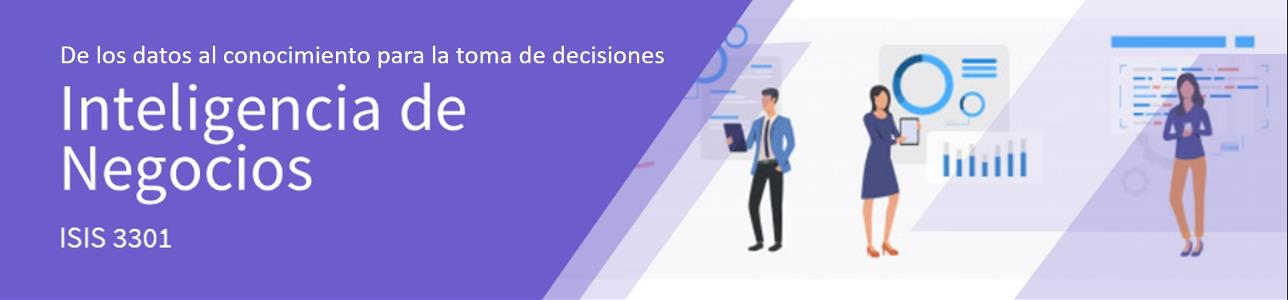

## Proyecto 1: Etapa 1  (Construcción de Modelos de Analítica de textos)

#### Integrantes (Grupo 37)

Antonin Bouillaud <br/> 
Ernesto Duarte Mantilla <br/>
Lina María Gómez Mesa. 

Este proyecto tiene como objetivo desarrollar un modelo de clasificación, con técnicas de aprendizaje
automático, que permita relacionar de manera automática un texto según los ODS. Dado que el número del grupo es impar se seleccionan los ODS 3,4,5.

## 0. Preparación
### 0.1. Importación de librerías

In [1]:
#########################################################################
# Instalación de Librerías
#########################################################################
!pip install scikit-learn==1.2.0
!pip install contractions
!pip install inflect
!pip install pandas-profiling
!pip install num2words
!pip install langdetect
!pip install swifter
!pip install openpyxl
!pip install spacy~=3.1
!pip install ipywidgets
!pip install --user -U nltk
!pip install eli5
!python -m spacy download es_core_news_sm


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 217.9 kB/s eta 0:01:00
     --------------------------------------- 0.0/12.9 MB 217.9 kB/s eta 0:01:00
     --------------------------------------- 0.0/12.9 MB 245.8 kB/s eta 0:00:53
     --------------------------------------- 0.1/12.9 MB 381.3 kB/s eta 0:00:34
     --------------------------------------- 0.1/12.9 MB 532.5 kB/s eta 0:00:24
      -------------------------------------- 0.2/12.9 MB 621.6 kB/s eta 0:00:21
      -------------------------------------- 0.3/12.9 MB 824.9 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.9 MB 880.6 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.9 MB 911.8 kB/s eta 0:00:14
     - ------------------------------------- 0.5/12.9 MB 962.6 kB/s eta 0:00:13
     - ------------------------------------- 0.6/12.9 MB

In [54]:
######################################################################
# Importación de librerias
######################################################################
import pandas as pd
pd.set_option('display.max_colwidth', None)
import spacy
import statistics
from nltk.stem import SnowballStemmer
import numpy as np
import sys
import warnings
import swifter
from pandas_profiling import ProfileReport
from langdetect import detect
import re, string, unicodedata
import contractions
from sklearn.linear_model import RidgeClassifier
from joblib import parallel_backend
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import string
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from nltk.corpus import stopwords
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import BaseEstimator, ClassifierMixin
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import FitFailedWarning
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, words
from num2words import num2words
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lgome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lgome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lgome\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lgome\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lgome\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


###  0.2. Carga de los datos

In [3]:
data = pd.read_excel("data\cat_345.xlsx")

In [4]:
data.columns

Index(['Textos_espanol', 'sdg'], dtype='object')

## 1. Entendimiento de los datos

Se revisan los valores que toman las columnas en algunos registros:

In [5]:
data.sample(5)

,Textos_espanol,sdg
261,"La amplitud de las reformas políticas ha variado dramáticamente entre los países. En unos pocos ha habido un rápido cambio estructural, mientras que en un mayor número de países los cambios se han limitado a cambios paramétricos (reducciones de salarios, precios de los medicamentos, aumentos de copagos). Los cambios más comunes han sido reformar los productos farmacéuticos para pagar menos a nivel nacional y fomentar un mayor uso de genéricos, aumentar los copagos y centralizar la compra o provisión de bienes y servicios de salud. Dicho esto, varias reformas han atraído considerables críticas y malestar político entre los trabajadores, la industria y la población en general.",3
2019,"En el Reino Unido y los Estados Unidos, así como en las AIE liberales en general, esta desfamiliarización se ha basado en gran medida en el mercado. Por el contrario, el norte de Europa ha hecho la transición a través de una expansión en la provisión pública de cuidados (ver la sección 3.1.3 sobre AIE socialdemócratas). Ambos regímenes son consistentes con tasas más altas de participación laboral femenina y fertilidad, aunque con resultados marcadamente diferentes para la distribución de la reproducción social. Volviendo a la cuestión de la reproducción social y el crecimiento, los salarios más altos para las mujeres son buenos para el crecimiento, pero las estructuras de cuidado privatizadas y altamente familiares significan que los salarios más altos y la participación en el mercado entre las mujeres pueden representar una amenaza para la producción de capacidades humanas y, en última instancia, comprometer el crecimiento. Geográficamente, estos regímenes se concentran entre los países del norte de Europa. Las políticas del mercado laboral promueven el pleno empleo y la igualdad salarial entre diferentes grupos de trabajadores, asegurando amplios ingresos fiscales y una menor dependencia del estado de bienestar (Esping-Anderson 1996).",5
575,"Saving Lives: Our Healthier Nation (Salvando vidas: nuestra nación más saludable) (Departamento de Salud, 1999) reconfirmó la salud mental como una prioridad clave para el NHS y estableció el objetivo de reducir en una quinta parte el suicidio y la muerte por lesiones indeterminadas asociadas con problemas de salud mental. El Marco de Servicios Nacionales para la Salud Mental en adultos en edad laboral publicado en 1999 fue una estrategia de 10 años, que resultó en un crecimiento significativo en la provisión de salud mental comunitaria con el desarrollo de enfoques de intervención temprana, extensión asertiva, intervención en crisis y tratamiento en el hogar y en la comunidad. â€œequiposâ€. La primera ley de salud mental en Inglaterra, la Ley de asilo del condado, se aprobó en 1808 y fue seguida por las Leyes de locura de 1845, 1890 y 1891.",3
1595,"Además, el documento trata de plantear varios debates asociados a las pruebas estandarizadas sin participación y resume las pruebas empíricas sobre los efectos de las pruebas en los resultados de la enseñanza y el aprendizaje. Las pruebas estandarizadas se utilizan a menudo en los países de la OCDE como medio para evaluar a los alumnos, los profesores y los centros escolares. Sin embargo, existen diferencias sustanciales entre los países en cuanto a la finalidad, el diseño, la aplicación y el uso de los resultados de las pruebas (Kellaghan et al., 2006). El término prueba estandarizada se refiere a las pruebas diseñadas externamente y cuyo objetivo es crear condiciones, preguntas, procedimientos de puntuación e interpretaciones que sean coherentes en todos los centros escolares (Popham, 1999, Wang et al., 2006).",4
923,"En estas zonas, el acceso adecuado al servicio de salud pasó de 64% en 1995 a 79% en 2000. Hoy, más de 1 000 EBAIS están presentes en todos los territorios del país y constituyen la base del sistema nacional de salud. En una nota más negativa, los EBAIS solo ofrecen citas por la mañana y temprano en la tarde, lo que limi

Se revisa el tipo de dato de cada atributo:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  3000 non-null   object
 1   sdg             3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Se observa que en los datos hay *2* columnas: *Textos_espanol* y *sdg*. La columna *sdg* es la variable objetivo y la columna *Textos_espanol* es la información textual. Asimismo, se contabiliza el número de registros.

In [7]:
total_rows_count = data.shape[0]
total_cols_count = data.shape[1]
print(f"Total de filas {total_rows_count} y columnas {total_cols_count}")

Total de filas 3000 y columnas 2


Antes de comenzar a plantear los modelos es importante dividirlo en dos partes: una para entrenamiento _train_ y otra para pruebas _test_. Esto es importante para poder evaluar el modelo que se construya. Para ello se utiliza la función train_test_split de la libreria sklearn.model_selection. Únicamente se realizará el análisis sobre el conjunto de entrenamiento.

###  1.1. Subdivisión de los datos en train y test

In [8]:

Y = data['sdg']
X = data.drop(['sdg'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234, stratify=Y)
print(f"Total de filas en entrenamiento {X_train.shape[0]} y test {X_test.shape[0]}")

Total de filas en entrenamiento 2400 y test 600


### 1.2. Análisis exploratorio de los datos

##### 1.2.1 Análisis de la variable objetivo

In [9]:
Y_train.value_counts(dropna = False, normalize = True)

sdg
3    0.333333
5    0.333333
4    0.333333
Name: proportion, dtype: float64

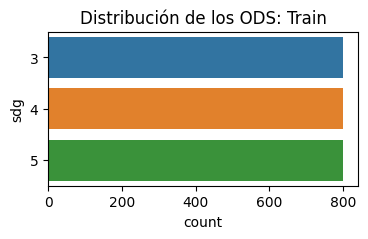

In [10]:
plt.figure(figsize=(4, 2))
sns.countplot(y=Y_train)
plt.title(f'Distribución de los ODS: Train')
plt.show()

Se observa que la cantidad de registros de cada uno de los ODS es la misma (0,33). Es decir que se cuenta con una misma cantidad de datos en las tres categorías para los procesos de clasificación, lo cuál indica que es un problema balanceado.

##### 1.2.3 Análisis de la variable Textos_espanol

In [11]:
X_train['idioma'] = X_train['Textos_espanol'].apply(detect)
X_train['idioma'].value_counts(dropna = False, normalize = True)

idioma
es    0.997917
en    0.001250
fr    0.000833
Name: proportion, dtype: float64

In [12]:
X_train[X_train['idioma']=="fr"]

,Textos_espanol,idioma
1077,"Dans le cours de cette etude, les comparaisons sont realizasees entre l'EFP et la formation académique a niveau d'education equivalente: ainsi, les resultats de la premiere option (opción 3e) sont compares a ceux de la deuxieme option (4e opción). Selon les objectifs poursuivis, d'autres comparaisons sont possibles et pourraient dresser un tableau different par rapport a celui present dans cette etude.",fr
2834,"Par ailleurs, les resultats suggerent que l'effet des services de la petite enfance sur l'emploi des femmes est renforce lorsqu'ils sont associes a d'autres mesures favorisant les meres qui travaillent (comme par exemple le conge paye parental), mais que celles-ci reduisent l'efficacite des incitations financieres a travailler pour le partenaire.",fr


De acuerdo a lo anterior, se observa que en los datos hay pequeño porcentaje de reseñas que se encuentran en inglés y en francés. Por lo tanto, estos son posibles registros candidatos a ser eliminados del conjunto de datos.

In [13]:
def contiene_caracter(texto):
    return 'Ã' in texto

filas_con_caracteres_no_alfanumericos = X_train['Textos_espanol'].apply(contiene_caracter)
conteo = filas_con_caracteres_no_alfanumericos.sum()

print(f'Número de filas con distinta codificación: {conteo}')

Número de filas con distinta codificación: 206


Asimismo, se observa que hay registros que tienen una codificación distinta a la del español (con carácteres como Ã,Ã³,©).

##### 1.2.2 Completitud

In [14]:
print((X_train.isnull().sum() / X_train.shape[0]).sort_values(ascending = False))

Textos_espanol    0.0
idioma            0.0
dtype: float64


##### 1.2.3 Duplicidad

In [15]:
duplicates = X_train.duplicated()
num_duplicates = duplicates.sum()
print("Número de duplicados: ", num_duplicates)

Número de duplicados:  0


##### 1.2.4 Estadísticas Descriptivas

In [16]:
textos = X_train.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] =  [statistics.mode([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']]
textos['Max'] =  [max([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]


ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 2. Preparación de los datos

En este caso, para poder realizar el pre-procesamiento de los datos (en particular la columna tipo texto), es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

In [17]:
############################################################
# Preprocesamiento Funciones: LIMPIEZA DE TEXTO
############################################################

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation in Spanish"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(int(word), lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in set(stopwords.words('spanish')):
            new_words.append(word)
    return new_words
def join_words(words):
    """Join a list of words into a single string"""
    return ' '.join(map(str, words))

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    words = join_words(words)
    return words

############################################################
# Preprocesamiento Funciones: LEMATIZACIÓN
############################################################
def stem_words(text):
    """Stem words in a text (Spanish)"""
    stemmer = SnowballStemmer("spanish")
    words = word_tokenize(text, language="spanish")
    stems = [stemmer.stem(word) for word in words]
    return stems
def lemmatize_verbs(text):
    """Lemmatize verbs in text (Spanish)"""
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(text)
    lemmas = [token.lemma_ if token.pos_ == "VERB" else token.text for token in doc]
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

#### 2.1 Limpieza de los datos

Se comienza por eliminar aquellos comentarios que no están en español. Para ello se utiliza la librería langdetect. Se crea una función que detecte el idioma de cada comentario y se elimina aquellos que no estén en español.

In [18]:
print("Total de filas inicialmente: ", X_train.shape[0])

es_mask = X_train['idioma'] == 'es'
X_train_clean = X_train.loc[es_mask].copy()
Y_train_clean = Y_train.loc[es_mask].copy()

assert X_train_clean['idioma'].value_counts(normalize=True)['es'] == 1.0
assert X_train_clean.shape[0] == Y_train_clean.shape[0]

X_train_clean.drop(['idioma'], axis=1, inplace=True)

print("Total de filas después de limpieza: ", X_train_clean.shape[0])
X_train_clean.sample(2)

Total de filas inicialmente:  2400
Total de filas después de limpieza:  2395


,Textos_espanol
878,"Estos niños y jóvenes pueden ser objeto de abusos físicos y sexuales, problemas psicológicos, adicción y otras consecuencias perjudiciales. Las mujeres se ven especialmente afectadas por las consecuencias del consumo de drogas, como las enfermedades de transmisión sexual y las consecuencias de la violencia doméstica, además de tener más probabilidades de verse afectadas por la delincuencia facilitada por las drogas. El consumo de drogas y la pobreza suelen estar relacionados de múltiples maneras."
1146,"El Capítulo 4 analiza el impacto de las universidades de doble sector de Australia en la transición de la educación vocacional a la superior. El Capítulo 5 destaca los vínculos entre la facultad y la universidad en Escocia y su impacto en la participación en la educación superior, centrándose en la educación superior de ciclo corto. El Capítulo 7 proporciona una descripción general del sistema emergente de “educación superior no universitaria” en Italia, que está estrechamente alineado con los objetivos de desarrollo regional."


#### 2.2 Tokenización

Ahora se aplica la función a la columna Textos_espanol y se aplica el pre-procesamiento de los datos. Para ello se crea una función que realice las siguientes tareas:
* Pasar a minúsculas.
* Reemplazar los números por su correspondiente palabra.
* Eliminar los signos de puntuación.
* Eliminar caracteres especiales.
* Eliminar stopwords.

In [19]:
X_train_clean['texto_limpio'] = X_train_clean['Textos_espanol'].swifter.apply(word_tokenize,language="spanish").swifter.apply(preprocessing)
X_train_clean.to_excel("data\cat_345_clean_sin_lema.xlsx")

Pandas Apply:   0%|          | 0/2395 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2395 [00:00<?, ?it/s]

#### 2.3 Normalización

In [20]:
X_train_clean['texto_limpio'] = X_train_clean['texto_limpio'].swifter.apply(stem_and_lemmatize).swifter.apply(join_words)
X_train_clean.to_excel("data\cat_345_clean_con_lema.xlsx")

Pandas Apply:   0%|          | 0/2395 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2395 [00:00<?, ?it/s]

Este mismo proceso se realiza para el conjunto de datos de test.

#### 2.4 Aplicación del Mismo Procesamiento a los Datos de Test

In [21]:
X_test['idioma'] = X_test['Textos_espanol'].apply(detect)

es_mask_t = X_test['idioma'] == 'es'
X_test_clean = X_test.loc[es_mask_t].copy()
Y_test_clean = Y_test.loc[es_mask_t].copy()

assert X_test_clean['idioma'].value_counts(normalize=True)['es'] == 1.0
assert X_test_clean.shape[0] == Y_test_clean.shape[0]

X_test_clean.drop(['idioma'], axis=1, inplace=True)

print("Total de filas después de limpieza: ", X_train_clean.shape[0])
X_test_clean['texto_limpio'] = X_test_clean['Textos_espanol'].swifter.apply(word_tokenize, language="spanish").swifter.apply(preprocessing)
X_test_clean.to_excel("data\cat_345_clean_sin_lema_test.xlsx")
X_test_clean['texto_limpio'] = X_test_clean['texto_limpio'].swifter.apply(stem_and_lemmatize).swifter.apply(join_words)
X_test_clean.to_excel("data\cat_345_clean_con_lema_test.xlsx")


Total de filas después de limpieza:  2395


Pandas Apply:   0%|          | 0/597 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/597 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/597 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/597 [00:00<?, ?it/s]

#### 2.5 Codificación del Texto

Posteriormente, se realiza la codificación del texto. Para ello se utiliza la librería CountVectorizer y TfidfVectorizer.

##### 2.5.1 Codificación del Texto CountVectorizer

In [22]:
def tokenizer(text):
    return word_tokenize(text, language="spanish")

dummy = CountVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('spanish'), lowercase=True)
X_train_BoW = dummy.fit_transform(X_train_clean['texto_limpio'])
X_test_BoW = dummy.transform(X_test_clean['texto_limpio'])

c:\Users\lgome\.conda\envs\bi\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


##### 2.5.2 Codificación del Texto Tfidf

In [23]:
vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words=stopwords.words('spanish'), tokenizer=tokenizer
    )
X_train_TFID = vectorizer.fit_transform(X_train_clean['texto_limpio'])
X_test_TFID = vectorizer.transform(X_test_clean['texto_limpio'])

## 3. Creación y Aplicación del modelo

###  3.1. Modelo 1 - Estudiante: Antonin Bouillaud (RF)

###  3.2. Modelo 2 - Estudiante: Ernesto Duarte Mantilla (KNN)

###  3.3. Modelo 3 - Estudiante: Lina María Gómez Mesa (NAIVE BAYES)

In [61]:
particiones = KFold(n_splits=5, shuffle=True, random_state=1234)
param_grid = {'alpha': np.arange(0.01, 10.01, 0.01)}
#clf = MultinomialNB()
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")

#####  3.3.1 Bag of Words

In [62]:
grid_search_BoW = GridSearchCV(clf, param_grid, cv=particiones, n_jobs=-1)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=Warning)
    grid_search_BoW.fit(X_train_BoW, Y_train_clean)
print(grid_search_BoW.best_params_)
print(grid_search_BoW.best_score_)
best_clf_BoW = grid_search_BoW.best_estimator_

{'alpha': 9.28}
0.9553235908141964


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       798
           4       1.00      1.00      1.00       799
           5       1.00      1.00      1.00       798

    accuracy                           1.00      2395
   macro avg       1.00      1.00      1.00      2395
weighted avg       1.00      1.00      1.00      2395



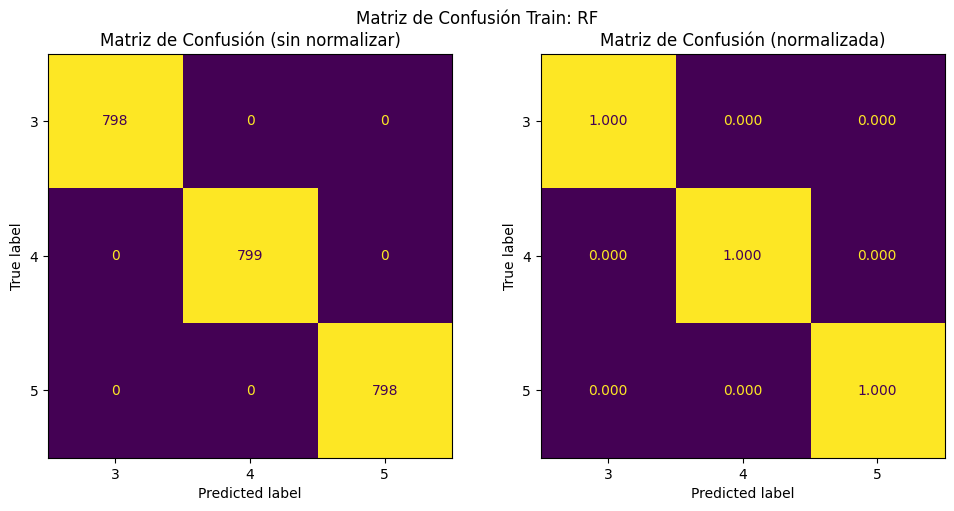

In [63]:
######################################################################
# Train
######################################################################
Y_pred_train_BoW = best_clf_BoW.predict(X_train_BoW)
print(classification_report(Y_train_clean, Y_pred_train_BoW))
######################################################################
# Matriz de Confusión
######################################################################
cm_BoW = confusion_matrix(Y_train_clean, Y_pred_train_BoW)
disp_BoW = ConfusionMatrixDisplay(confusion_matrix=cm_BoW, display_labels=best_clf_BoW.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_BoW.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')

cm_BoW_norm = confusion_matrix(Y_train_clean, Y_pred_train_BoW, normalize='true')
disp_BoW_norm = ConfusionMatrixDisplay(confusion_matrix=cm_BoW_norm, display_labels=best_clf_BoW.classes_)
disp_BoW_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Train: RF')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           3       0.94      0.92      0.93       198
           4       0.95      0.95      0.95       199
           5       0.94      0.95      0.95       200

    accuracy                           0.94       597
   macro avg       0.94      0.94      0.94       597
weighted avg       0.94      0.94      0.94       597



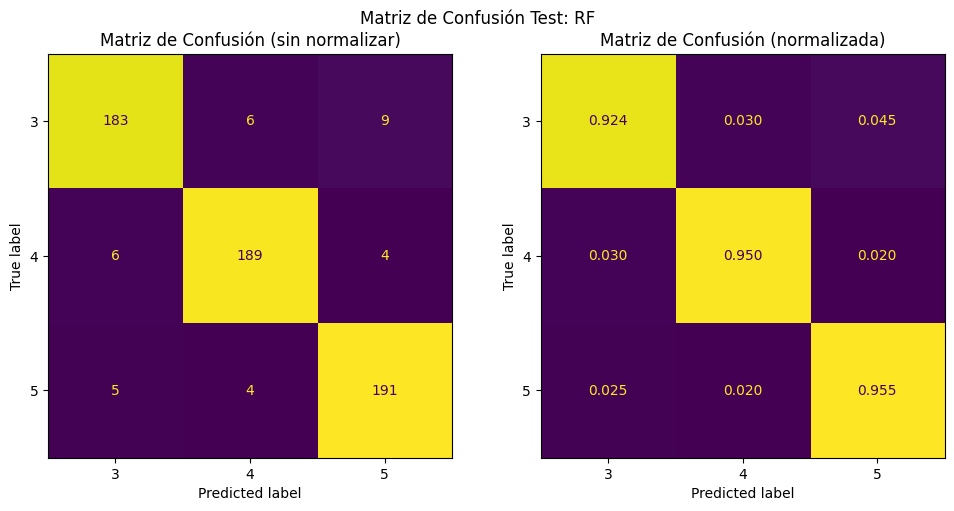

In [64]:
######################################################################
# Test
######################################################################
Y_pred_test_BoW = best_clf_BoW.predict(X_test_BoW)
print(classification_report(Y_test_clean, Y_pred_test_BoW))
######################################################################
# Matriz de Confusión
######################################################################
cm_BoW = confusion_matrix(Y_test_clean, Y_pred_test_BoW)
disp_BoW = ConfusionMatrixDisplay(confusion_matrix=cm_BoW, display_labels=best_clf_BoW.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_BoW.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_BoW_norm = confusion_matrix(Y_test_clean, Y_pred_test_BoW, normalize='true')
disp_BoW_norm = ConfusionMatrixDisplay(confusion_matrix=cm_BoW_norm, display_labels=best_clf_BoW.classes_)
disp_BoW_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Test: RF')
plt.tight_layout()
plt.show()


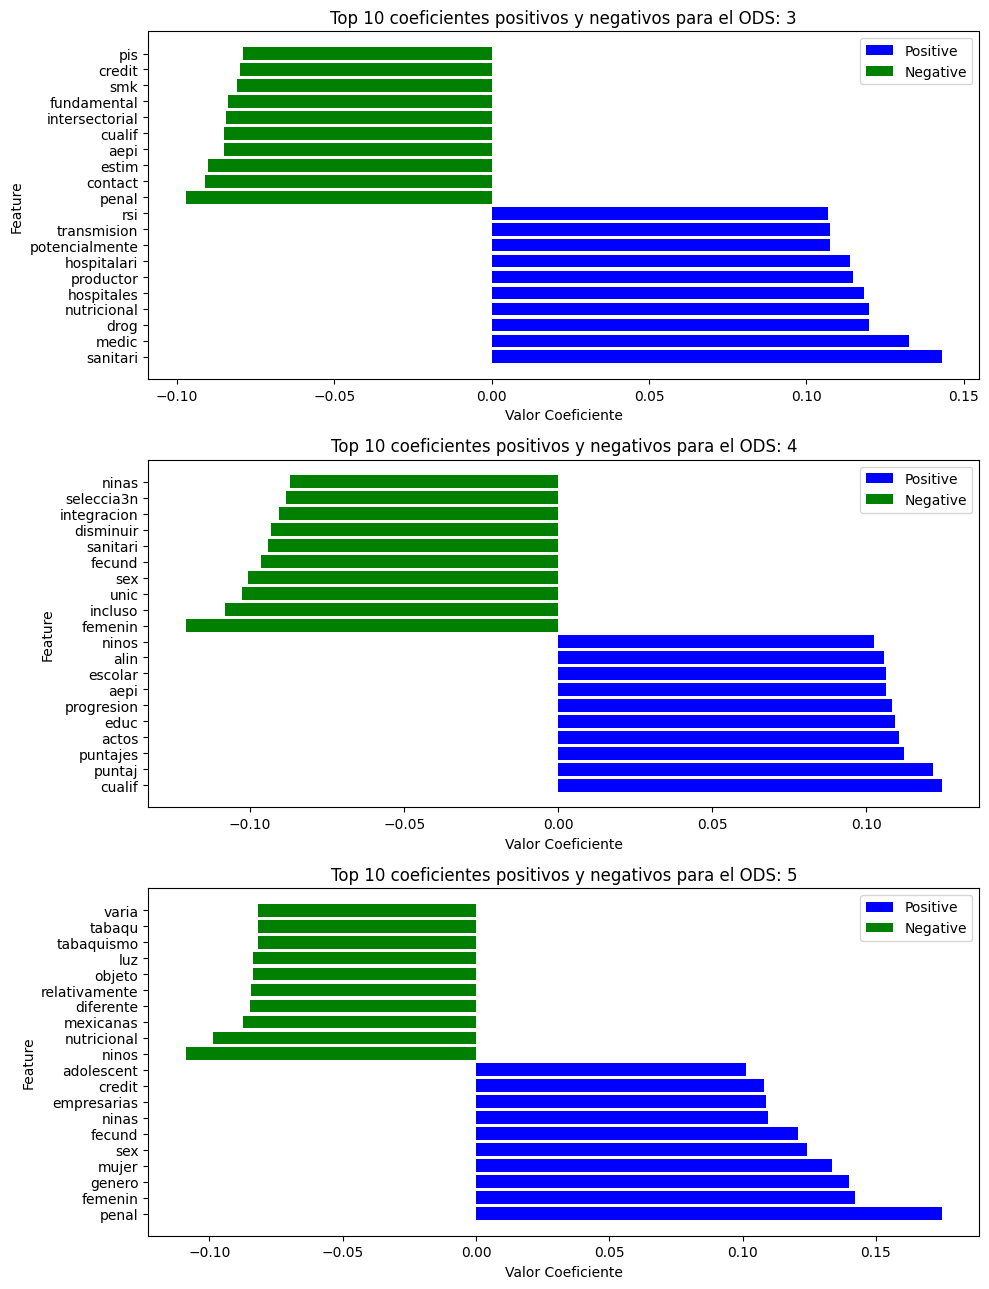

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=3, figsize=(10, 13))
for i in range(3):
    coefficients_df = pd.DataFrame({'Feature': dummy.get_feature_names_out(), 'Coefficient': best_clf_BoW.coef_[i]})

    # Sort the DataFrame by coefficient values in descending order and select the top 10 positive and negative coefficients.
    top_positive = coefficients_df.sort_values(by='Coefficient', ascending=False).head(10)
    top_negative = coefficients_df.sort_values(by='Coefficient', ascending=True).head(10)
    # Concatenate the top positive and negative coefficients.
    axs[i].barh(top_positive['Feature'], top_positive['Coefficient'], color='blue')
    axs[i].barh(top_negative['Feature'], top_negative['Coefficient'], color='green')
    axs[i].set_title(f"Top 10 coeficientes positivos y negativos para el ODS: {i+3}")
    axs[i].set_xlabel("Valor Coeficiente")
    axs[i].set_ylabel("Feature")
    axs[i].legend(['Positive', 'Negative'])
plt.tight_layout()
plt.show()

In [84]:
for i, tag in enumerate(best_clf_BoW.classes_):
    coefficients = best_clf_BoW.coef_[i]
    weights = list(zip(dummy.get_feature_names_out(), coefficients))
    print(f"Tag: {tag}")
    print("Most positive Coefficients: ")
    print(sorted(weights, key=lambda x: -x[1])[:10])
    print("Most negative Coefficients: ")
    print(sorted(weights, key=lambda x: x[1])[:10])
    print("*"*50)

Tag: 3
Most positive Coefficients: 
[('sanitari', 0.14303588437267642), ('medic', 0.13250892934132372), ('drog', 0.11996461180938585), ('nutricional', 0.11989002485058592), ('hospitales', 0.1183695020681163), ('productor', 0.11495416694555653), ('hospitalari', 0.11375453871729466), ('potencialmente', 0.10753502217535127), ('transmision', 0.10748819559778326), ('rsi', 0.10705538277704117)]
Most negative Coefficients: 
[('penal', -0.09721609914983376), ('contact', -0.09101367938486964), ('estim', -0.09007535006870644), ('aepi', -0.08524885432885336), ('cualif', -0.08505352957966042), ('intersectorial', -0.08445991113254027), ('fundamental', -0.0838652769773827), ('smk', -0.08103139749764185), ('credit', -0.07998250753252402), ('pis', -0.07900197611278796)]
**************************************************
Tag: 4
Most positive Coefficients: 
[('cualif', 0.12446990081177199), ('puntaj', 0.1217253478114543), ('puntajes', 0.112331920224169), ('actos', 0.11053398275065635), ('educ', 0.109177

#####  3.3.2 Tfidf

In [107]:
grid_search_TFID = GridSearchCV(clf, param_grid, cv=particiones, n_jobs=-1)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=Warning)
    grid_search_TFID.fit(X_train_TFID, Y_train_clean)
print(grid_search_TFID.best_params_)
print(grid_search_TFID.best_score_)
best_clf_TFID = grid_search_TFID.best_estimator_

{'alpha': 0.79}
0.9807933194154488


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       798
           4       1.00      1.00      1.00       799
           5       1.00      1.00      1.00       798

    accuracy                           1.00      2395
   macro avg       1.00      1.00      1.00      2395
weighted avg       1.00      1.00      1.00      2395



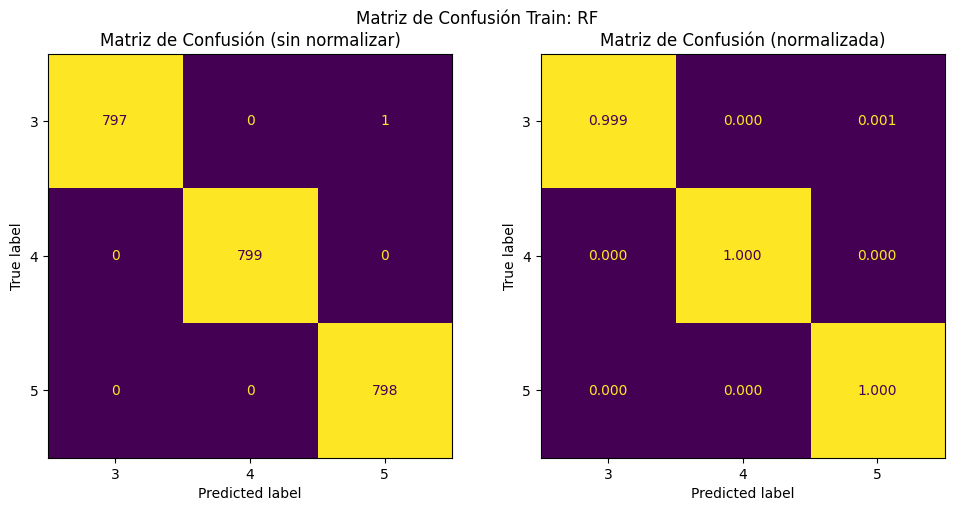

In [109]:
######################################################################
# Train
######################################################################
Y_pred_train_TFID = best_clf_TFID.predict(X_train_TFID)
print(classification_report(Y_train_clean, Y_pred_train_TFID))
######################################################################
# Matriz de Confusión
######################################################################
cm_TFID = confusion_matrix(Y_train_clean, Y_pred_train_TFID)
disp_TFID = ConfusionMatrixDisplay(confusion_matrix=cm_TFID, display_labels=best_clf_TFID.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_TFID.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_TFID_norm = confusion_matrix(Y_train_clean, Y_pred_train_TFID, normalize='true')
disp_TFID_norm = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_norm, display_labels=best_clf_TFID.classes_)
disp_TFID_norm.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Train: RF')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           3       0.99      0.97      0.98       198
           4       0.97      0.99      0.98       199
           5       0.98      0.98      0.98       200

    accuracy                           0.98       597
   macro avg       0.98      0.98      0.98       597
weighted avg       0.98      0.98      0.98       597



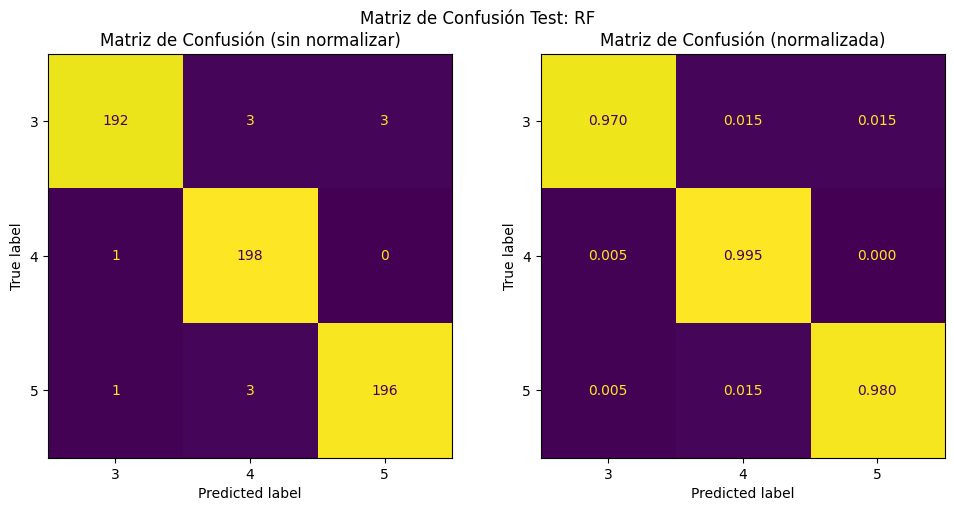

In [110]:
######################################################################
# Test
######################################################################
Y_pred_test_TFID = best_clf_TFID.predict(X_test_TFID)
print(classification_report(Y_test_clean, Y_pred_test_TFID))
######################################################################
# Matriz de Confusión
######################################################################
cm_TFID_test = confusion_matrix(Y_test_clean, Y_pred_test_TFID)
disp_TFID_test = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_test, display_labels=best_clf_TFID.classes_)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
disp_TFID_test.plot(ax=ax[0], values_format='d', colorbar=False)
ax[0].set_title('Matriz de Confusión (sin normalizar)')
cm_TFID_norm_test = confusion_matrix(Y_test_clean, Y_pred_test_TFID, normalize='true')
disp_TFID_norm_test = ConfusionMatrixDisplay(confusion_matrix=cm_TFID_norm_test, display_labels=best_clf_TFID.classes_)
disp_TFID_norm_test.plot(ax=ax[1], values_format='.3f', colorbar=False)
ax[1].set_title('Matriz de Confusión (normalizada)')
plt.suptitle('Matriz de Confusión Test: RF')
plt.tight_layout()
plt.show()

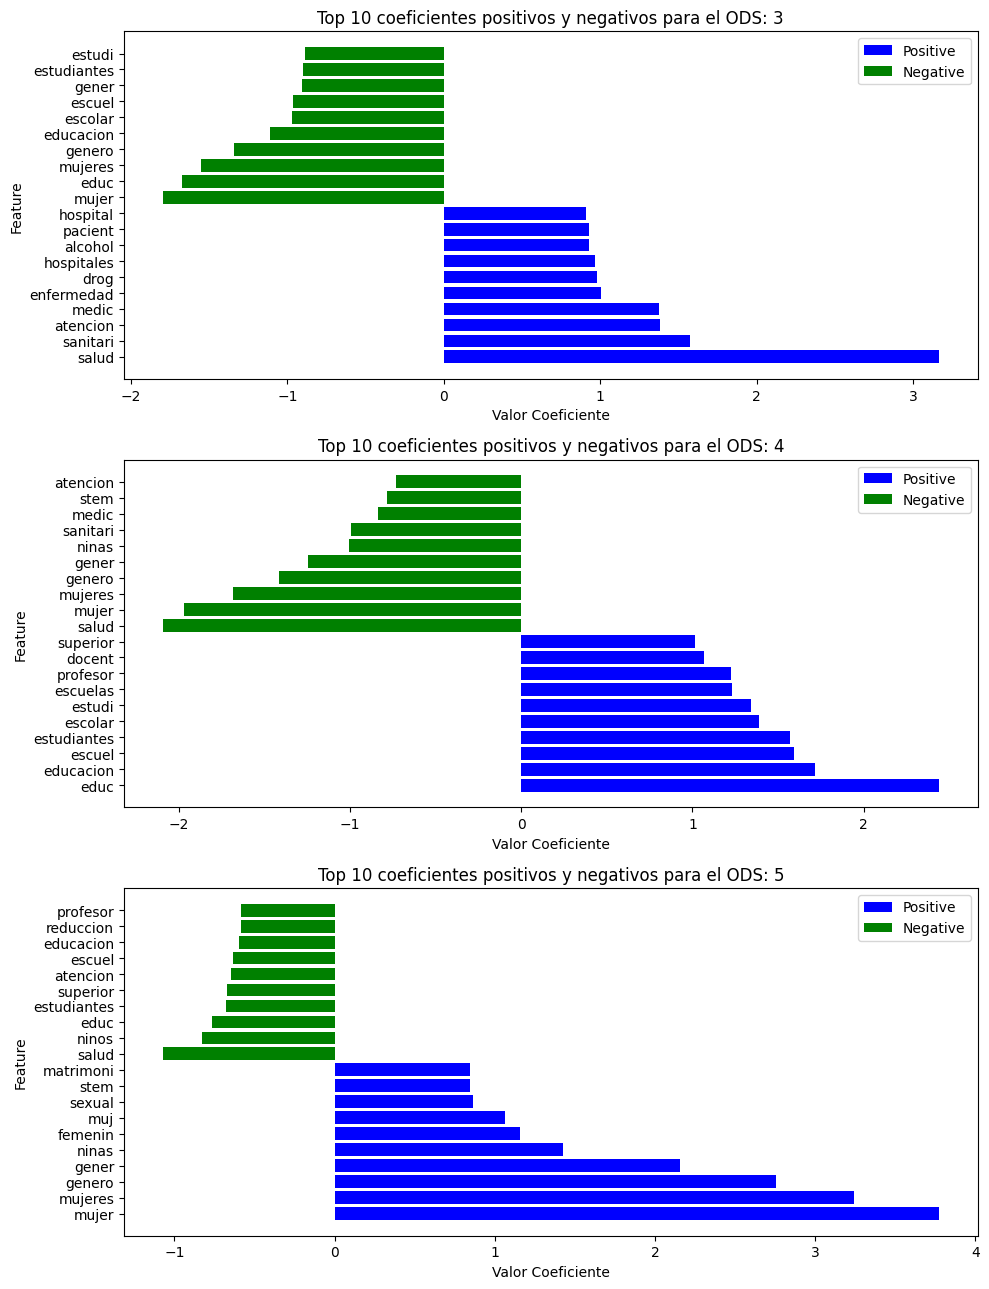

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=3, figsize=(10, 13))
for i in range(3):
    coefficients_df = pd.DataFrame({'Feature': vectorizer.get_feature_names_out(), 'Coefficient': best_clf_TFID.coef_[i]})

    top_positive = coefficients_df.sort_values(by='Coefficient', ascending=False).head(10)
    top_negative = coefficients_df.sort_values(by='Coefficient', ascending=True).head(10)

    axs[i].barh(top_positive['Feature'], top_positive['Coefficient'], color='blue')
    axs[i].barh(top_negative['Feature'], top_negative['Coefficient'], color='green')
    axs[i].set_title(f"Top 10 coeficientes positivos y negativos para el ODS: {i+3}")
    axs[i].set_xlabel("Valor Coeficiente")
    axs[i].set_ylabel("Feature")
    axs[i].legend(['Positive', 'Negative'])
plt.tight_layout()
plt.show()

In [114]:
for i, tag in enumerate(best_clf_TFID.classes_):
    coefficients = best_clf_TFID.coef_[i]
    weights = list(zip(vectorizer.get_feature_names_out(), coefficients))
    print(f"Tag: {tag}")
    print("Most positive Coefficients: ")
    print(sorted(weights, key=lambda x: -x[1])[:10])
    print("Most negative Coefficients: ")
    print(sorted(weights, key=lambda x: x[1])[:10])
    print("*"*50)

Tag: 3
Most positive Coefficients: 
[('salud', 3.165443029599452), ('sanitari', 1.575408546606759), ('atencion', 1.3803692630662647), ('medic', 1.3735069596362526), ('enfermedad', 1.0058339978773059), ('drog', 0.9803623428862889), ('hospitales', 0.9683368227040556), ('alcohol', 0.9300266258402455), ('pacient', 0.9289682002012124), ('hospital', 0.9106807667743501)]
Most negative Coefficients: 
[('mujer', -1.797981443021394), ('educ', -1.6724119869526959), ('mujeres', -1.5542992720826199), ('genero', -1.3436488473726418), ('educacion', -1.1114862967547086), ('escolar', -0.9685206067833572), ('escuel', -0.9668884063603106), ('gener', -0.9100670951791532), ('estudiantes', -0.9000093857770942), ('estudi', -0.8907109543020778)]
**************************************************
Tag: 4
Most positive Coefficients: 
[('educ', 2.4387062661141727), ('educacion', 1.7140857131658045), ('escuel', 1.5939941512795777), ('estudiantes', 1.5675715219137742), ('escolar', 1.3858482334571482), ('estudi', 1.

## 4. Resultados Finales (Parte 1)